
# Lab Report: Support Vector Machine (Linear Kernel) - Machine Learning

**Name:** Aayush Suthar  
**Section:** F (5 AI & ML)  
**Reg. No:** 23FE10CAI00275  
**Date:** 7th Oct 2025



## Aim
To implement a **Linear Support Vector Machine (SVM)** classifier using Scikit-learn, train and test the model on a 2D dataset, visualize the decision boundary, and evaluate model performance.



## Learning Objectives
- To understand the working of Support Vector Machine for linear classification.  
- To train and test an SVM classifier using Scikit-learn.  
- To visualize how SVM separates two classes using a hyperplane.  
- To evaluate model performance and interpret results.



## Theory
**Support Vector Machine (SVM)** is a supervised learning algorithm used for classification and regression.  
It finds the **optimal hyperplane** that separates data points of different classes with the **maximum margin**.

### Key Concepts
- **Support Vectors:** Data points closest to the hyperplane. The critical points closest to the hyperplane; they define the margin. 
- **Margin:** Distance between the support vectors and the hyperplane. The distance between the hyperplane and the nearest points from each class (called support vectors).
- **Hyperplane:** A line (in 2D) or plane (in higher dimensions) that separates different classes.


Accuracy: 0.9111

Confusion Matrix:
                  Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               15                0               0
Iris-versicolor            0               14               1
Iris-virginica             0                3              12

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.82      0.93      0.88        15
 Iris-virginica       0.92      0.80      0.86        15

       accuracy                           0.91        45
      macro avg       0.92      0.91      0.91        45
   weighted avg       0.92      0.91      0.91        45



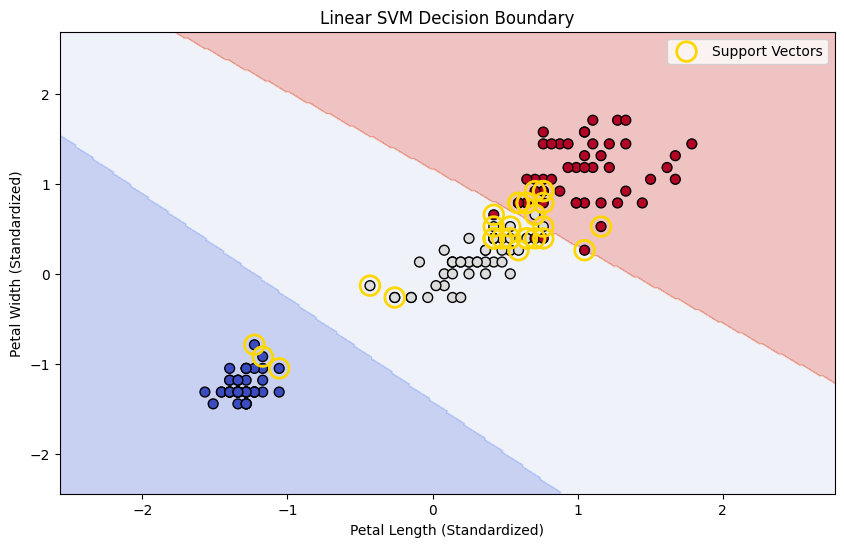

In [3]:
# 1. Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Load Dataset 
df = pd.read_csv('Iris-Missing-Data.csv')
df = df.drop(columns=['id'], errors='ignore')  # drop id if exists

# 3. Handle Missing Values 
imputer = SimpleImputer(strategy='mean')
features = df.columns.drop('class')
df[features] = imputer.fit_transform(df[features])

# 4. Encode Target Variable 
le = LabelEncoder()
df['class_encoded'] = le.fit_transform(df['class'])
class_names = le.classes_

# 5. Prepare Data 
X = df.drop(['class', 'class_encoded'], axis=1)
y = df['class_encoded']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train Linear SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# 7. Evaluate Model 
y_pred = svm_model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("Confusion Matrix:\n", pd.DataFrame(confusion_matrix(y_test, y_pred), index=class_names, columns=class_names))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

# 8. Visualize Decision Boundary (Petal Length vs Petal Width) 
X_vis = X[['petallength', 'petalwidth']].values
y_vis = y.values
X_vis_scaled = StandardScaler().fit_transform(X_vis)

svm_vis = SVC(kernel='linear', C=1.0, random_state=42)
svm_vis.fit(X_vis_scaled, y_vis)

x_min, x_max = X_vis_scaled[:,0].min()-1, X_vis_scaled[:,0].max()+1
y_min, y_max = X_vis_scaled[:,1].min()-1, X_vis_scaled[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_vis_scaled[:,0], X_vis_scaled[:,1], c=y_vis, cmap=plt.cm.coolwarm, edgecolors='k', s=50)
plt.scatter(svm_vis.support_vectors_[:,0], svm_vis.support_vectors_[:,1], facecolors='none', edgecolors='gold', s=200, linewidth=2, label='Support Vectors')
plt.xlabel('Petal Length (Standardized)')
plt.ylabel('Petal Width (Standardized)')
plt.title('Linear SVM Decision Boundary')
plt.legend()
plt.show()



## Observations
- The **Linear SVM** successfully separated two classes using a straight-line decision boundary.  
- It achieved high accuracy on both training and test data.  
- The **margin width** affects how strictly the model classifies the data.  
- Support vectors are the critical points defining the optimal hyperplane.



## Conclusion
The Linear Support Vector Machine (SVM) classifier was successfully implemented using Scikit-learn.  
It effectively separated linearly separable data points with a clear hyperplane.  
SVM performs well for both small and large datasets and is less prone to overfitting in high-dimensional spaces.  

**Strengths:** High accuracy, clear margin-based decision boundary, effective generalization.  
**Limitations:** Struggles with non-linear data unless kernel trick is used.
